# **Import libraries** <a class="anchor" id="5"></a>


In [931]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# **Import dataset** <a class="anchor" id="6"></a>

In [932]:
data = 'adult.csv'

df = pd.read_csv(data, header=None, sep=',')

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


# **Exploratory data analysis** <a class="anchor" id="7"></a>


In [933]:
df.shape

(32561, 14)

We can see that there are 32561 instances and 14 attributes in the data set.

### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [934]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'race', 'Gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,Gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


### View summary of dataset

In [935]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   race            32561 non-null  object
 8   Gender          32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore categorical variables.

### Explore categorical variables

In [936]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'race', 'Gender', 'native_country', 'income']


In [937]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,race,Gender,native_country,income
0,State-gov,Bachelors,Single,Adm-clerical,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married,Exec-managerial,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States,<=50K
3,Private,11th,Married,Handlers-cleaners,Black,Male,United-States,<=50K
4,Private,Bachelors,Married,Prof-specialty,Black,Female,Cuba,<=50K


# **Data Preprocessing** <a class="anchor" id="10"></a>

### **Explore problems within categorical variables**





### Missing values in categorical variables

In [938]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
race              0
Gender            0
native_country    0
income            0
dtype: int64

### Frequency counts of categorical variables


In [939]:
# view frequency counts of values in categorical variables

for var in categorical: 
    print('**************************')
    print(var)
    print('---------------------------')
    print(df[var].value_counts())

**************************
workclass
---------------------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
**************************
education
---------------------------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
**************************
marital_status
---------------------------
Married      15417
Single       10683
Divorced      4443
Separated     1025
Widowed        993
Name: marital_status, dtype: int64
************************

Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

I will explore these variables and replace `?` with `NaN`.

### Explore workclass variable

In [940]:
# check labels in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [941]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?', np.NaN, inplace=True)

In [942]:
# again check the frequency distribution of values in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Now, we can see that there are no values encoded as `?` in the `workclass` variable.

I will adopt similar approach with `occupation` and `native_country` column.

### Explore occupation variable

In [943]:
# check labels in occupation variable

df.occupation.unique()


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [944]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)


In [945]:
# again check the frequency distribution of values in occupation variable

df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

### Explore native_country variable


In [946]:
# check labels in native_country variable

df.native_country.unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [947]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?', np.NaN, inplace=True)

In [948]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

### Check missing values in categorical variables again

In [949]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
race                 0
Gender               0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Explore Numerical Variables

In [950]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [951]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### **Explore problems within numerical variables**




### Missing values in numerical variables

In [952]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values. 

In [953]:
for col in categorical:
    if df[col].isnull().sum()>0:
        print(col, (df[col].isnull().sum()))

workclass 1836
occupation 1843
native_country 583


In [954]:
# impute missing categorical variables with most frequent value

df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)   

In [955]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
race              0
Gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Check outliers for numerical variables

In [956]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [957]:
def out_iqr(df , column):
    global lower,upper
    q1, q3 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q3 - q1
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q1 - cut_off, q3 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

The IQR is 20.0
The lower bound value is -2.0
The upper bound value is 78.0
Total number of outliers are 143


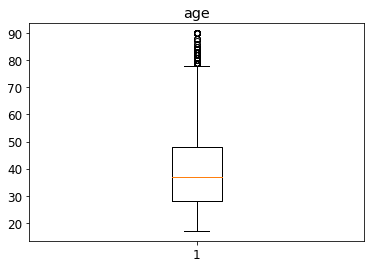

The IQR is 119224.0
The lower bound value is -61009.0
The upper bound value is 415887.0
Total number of outliers are 992


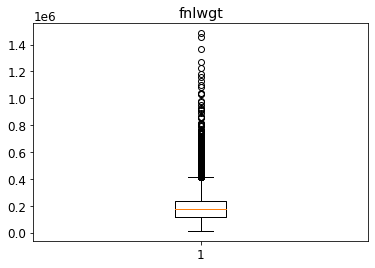

The IQR is 3.0
The lower bound value is 4.5
The upper bound value is 16.5
Total number of outliers are 1198


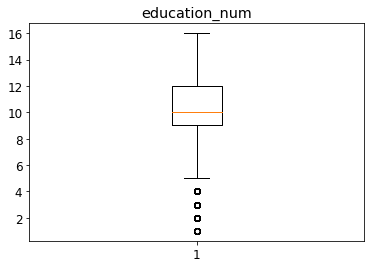

The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
Total number of outliers are 2712


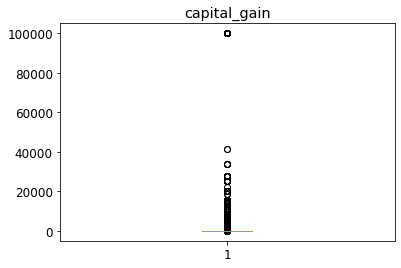

The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
Total number of outliers are 1519


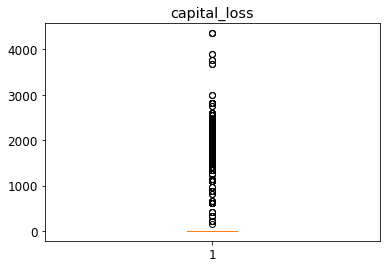

The IQR is 5.0
The lower bound value is 32.5
The upper bound value is 52.5
Total number of outliers are 9008


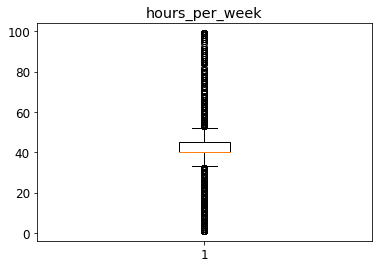

In [958]:
for n in numerical:
    out_iqr(df,n)
    plt.boxplot(df[n])
    plt.title(n)
    plt.show()

### **Methods to Handle the outliers**
**Trimming :** trimming simply means removing the outliers and get rid of it. but this technique is not much useful because we can loose some useful information by doing so. 

In [959]:
out_iqr(df,'age')


The IQR is 20.0
The lower bound value is -2.0
The upper bound value is 78.0
Total number of outliers are 143


In [960]:
outliers = np.where(df['age']>upper,True, np.where(df['age']<lower,True,False))
new_df = df.loc[~(outliers)]

In [961]:
out_iqr(new_df,'age')

The IQR is 19.0
The lower bound value is -0.5
The upper bound value is 75.5
Total number of outliers are 98



**Censoring(Capping) :** It means setting the variable distribution at maximum and minimum values.

In [962]:
new_df = df.copy()
lower_bound = df['age'].quantile(0.10)
upper_bound = df['age'].quantile(0.90)

new_df['age'] = np.where(df['age']>upper_bound,upper_bound, np.where(df['age']<lower_bound,lower_bound,df['age']))

In [963]:
out_iqr(new_df,'age')

The IQR is 20.0
The lower bound value is -2.0
The upper bound value is 78.0
Total number of outliers are 0


In [964]:
for n in numerical:
    iqr = df[n].quantile(0.75) - df[n].quantile(0.25)
    lower_bound = df[n].quantile(0.25)-1.5*iqr
    upper_bound = df[n].quantile(0.75)+1.5*iqr
    df[n] = np.where(df[n]>upper_bound,df[n].quantile(0.9), np.where(df[n]<lower_bound,df[n].quantile(0.1),df[n]))

In [965]:
for n in numerical:
    out_iqr(df,n)

The IQR is 20.0
The lower bound value is -2.0
The upper bound value is 78.0
Total number of outliers are 0
The IQR is 119224.0
The lower bound value is -61009.0
The upper bound value is 415887.0
Total number of outliers are 0
The IQR is 3.0
The lower bound value is 4.5
The upper bound value is 16.5
Total number of outliers are 0
The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
Total number of outliers are 0
The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
Total number of outliers are 0
The IQR is 5.0
The lower bound value is 32.5
The upper bound value is 52.5
Total number of outliers are 9008


# **Feature Engineering** #
**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

### Encode categorical variables

In [966]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'race',
 'Gender',
 'native_country',
 'income']

In [967]:
df[categorical[:-1]].head()

,workclass,education,marital_status,occupation,race,Gender,native_country
0,State-gov,Bachelors,Single,Adm-clerical,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married,Exec-managerial,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States
3,Private,11th,Married,Handlers-cleaners,Black,Male,United-States
4,Private,Bachelors,Married,Prof-specialty,Black,Female,Cuba


In [968]:
df['education'].head(10)

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
5      Masters
6          9th
7      HS-grad
8      Masters
9    Bachelors
Name: education, dtype: object

In [969]:
from sklearn.preprocessing import LabelEncoder

ordinal_encoder = LabelEncoder()
ordinal_encoder.fit_transform(df[['education']])[:10]

c:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 9,  9, 11,  1,  9, 12,  6, 11, 12,  9])

In [970]:
from sklearn.preprocessing import OneHotEncoder
df= pd.get_dummies(df, columns = categorical[:-1], drop_first=True)

df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39.0,77516.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,24.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Declare feature vector and target variable** <a class="anchor" id="8"></a>


In [971]:
x = df.drop(['income'], axis=1)

y = df['income']

# **Split data into separate training and test set** <a class="anchor" id="9"></a>

In [972]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3  , random_state = 42)


In [973]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((22792, 90), (9769, 90))

# **Feature Scaling** <a class="anchor" id="11"></a>

In [974]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
x_train[numerical] = scaler2.fit_transform(x_train[numerical])
x_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
19749,0.278689,0.109463,0.363636,0.0,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1216,0.508197,0.573260,0.454545,0.0,0.0,0.516129,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27962,0.098361,0.109319,0.454545,0.0,0.0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23077,0.639344,0.602438,0.363636,0.0,0.0,0.516129,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10180,0.000000,0.706115,0.181818,0.0,0.0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.491803,0.860279,0.727273,0.0,0.0,0.516129,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5390,0.229508,0.334348,0.272727,0.0,0.0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,0.016393,0.505496,0.181818,0.0,0.0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15795,0.540984,0.104014,0.363636,0.0,0.0,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [975]:
x_test[numerical] = scaler.transform(x_test[numerical])

In [976]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numerical] = scaler.fit_transform(x_train[numerical])
x_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
19749,-0.333326,-1.423360,-0.535521,0.0,0.0,-1.783997,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1216,0.711932,0.663984,-0.099233,0.0,0.0,0.001616,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27962,-1.154600,-1.424007,-0.099233,0.0,0.0,-1.783997,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23077,1.309223,0.795299,-0.535521,0.0,0.0,0.001616,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10180,-1.602567,1.261902,-1.408098,0.0,0.0,-1.783997,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.637271,1.955728,1.209632,0.0,0.0,0.001616,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5390,-0.557310,-0.411254,-0.971810,0.0,0.0,-1.783997,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,-1.527906,0.359008,-1.408098,0.0,0.0,-1.783997,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15795,0.861255,-1.447884,-0.535521,0.0,0.0,1.675628,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **Model training** <a class="anchor" id="12"></a>

# **Predict the results** <a class="anchor" id="13"></a>

# **Check accuracy score** <a class="anchor" id="14"></a>

In [979]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7631


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

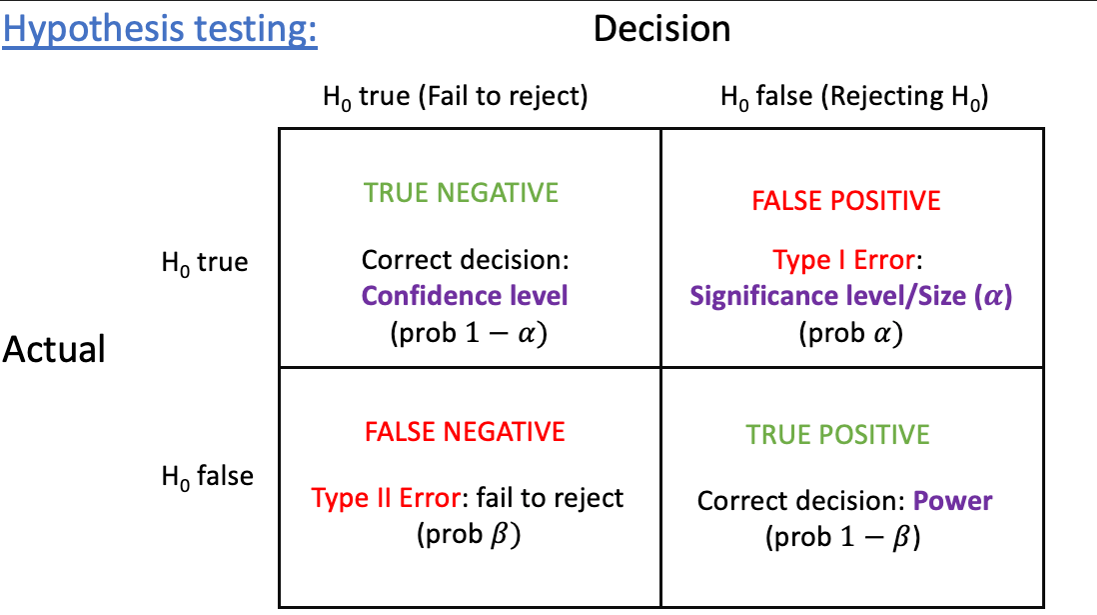

# **Confusion matrix** <a class="anchor" id="15"></a>


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [998]:
cm = confusion_matrix(y_test, prediction)
cm

array([[7415,   40],
       [2290,   24]], dtype=int64)

The confusion matrix shows `7415 + 24 = 7439 correct predictions` and `40 + 2290 = 2330 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1)  7415


- `True Negatives` (Actual Negative:0 and Predict Negative:0)  24


- `False Positives` (Actual Negative:0 but Predict Positive:1)  40 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0)  2290 `(Type II error)`

# **Classification metrices** <a class="anchor" id="16"></a>

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [982]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.87      7455
        >50K       0.00      0.00      0.00      2314

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [983]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

### Classification accuracy

In [984]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [985]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7631


### Classification error

In [986]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2369


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.



In [987]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 1.0000


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.



In [988]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7631


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [989]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7631
